In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [5]:
df=pd.read_csv("/content/drive/My Drive/Data file.csv")

In [6]:
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [7]:
# Changing column name of Unnamed: 0
df=df.rename(columns={"Unnamed: 0": "SL NO"})

In [8]:
df.head(5)

,SL NO,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
# Checking if any null value is the data
df.isnull().sum()

SL NO                   0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
# no null value in data

In [12]:
df.describe()

,SL NO,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [13]:
#  looks there are outliers in the data

In [16]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SL NO                 209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [18]:
df.shape

(209593, 37)

In [19]:
for col in df.select_dtypes(['object']).columns:
  print(col,':',df[col].nunique())

msisdn : 186243
pcircle : 1
pdate : 82


In [20]:
# we an drop these columns as mobile number, pcircle i.e telecom circle and data is not the important columns for the model

In [22]:
for col in ['msisdn','pcircle','pdate']:
  df.drop([col],1,inplace=True)

In [23]:
df.shape

(209593, 34)

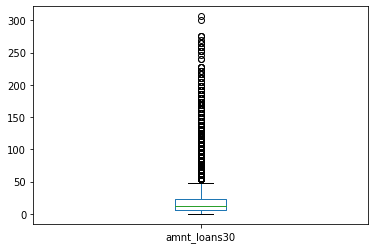

In [25]:
# Unnivariate analysis
df['amnt_loans30'].plot.box()

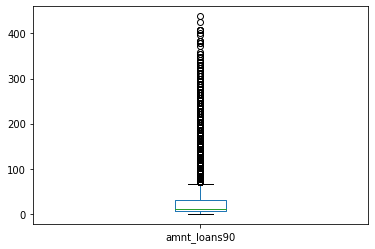

In [26]:
df['amnt_loans90'].plot.box()

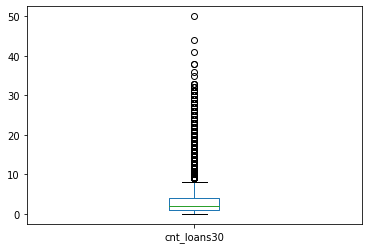

In [28]:
df['cnt_loans30'].plot.box()

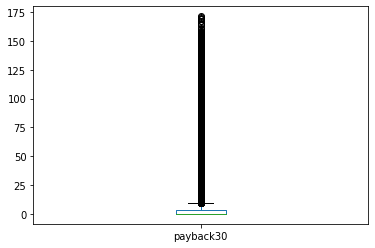

In [29]:
df['payback30'].plot.box()

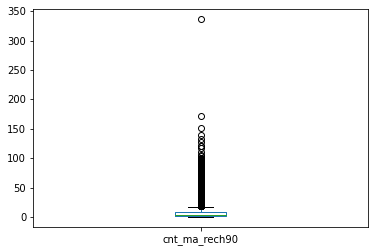

In [30]:
df['cnt_ma_rech90'].plot.box()

In [31]:
# Basis of univariate analysis it looks data has outlier

In [33]:
# using zscore to rmove the outlier
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [35]:
df.shape,df1.shape

((209593, 34), (161465, 34))

In [43]:
# now we hve remove the outliers nd oour new data set is df1

In [44]:
# Checcking skewness of data
skw=df1.skew()
skw

SL NO                    0.000323
label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90  

In [45]:
# positive skewness needs to be treated
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
skw=df1.skew()
skw

SL NO                    0.000323
label                   -2.090315
aon                           NaN
daily_decr30                  NaN
daily_decr90                  NaN
rental30                -1.342581
rental90                -1.298290
last_rech_date_ma             NaN
last_rech_date_da             NaN
last_rech_amt_ma        -2.064001
cnt_ma_rech30           -0.197647
fr_ma_rech30             0.381065
sumamnt_ma_rech30       -1.676128
medianamnt_ma_rech30    -1.759723
medianmarechprebal30    -0.487028
cnt_ma_rech90           -0.221177
fr_ma_rech90             0.479830
sumamnt_ma_rech90       -1.926452
medianamnt_ma_rech90    -2.098929
medianmarechprebal90    -0.646785
cnt_da_rech30           40.271415
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              0.603218
amnt_loans30             0.124196
maxamnt_loans30          5.691116
medianamnt_loans30       5.355423
cnt_loans90              0.653372
amnt_loans90  

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)

In [40]:
x.shape

(161465, 34)

In [41]:
x.head(5)

,SL NO,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-1.730966,-2.491638,-0.753989,-0.126467,-0.169679,-0.644046,-0.635286,-0.411410,-0.119438,-0.129929,-0.468416,3.116889,-0.478194,-0.020133,-0.433767,-0.663040,1.337962,-0.635883,-0.046800,-0.527748,-0.020514,0.0,-0.141331,0.0,-0.271757,-0.324496,-0.022490,-0.180636,-0.431731,-0.460004,-0.331915,-0.159769,6.238367,5.206904
1,-1.730949,0.401342,0.132221,1.475220,1.235024,0.622504,0.338713,1.463090,-0.119438,2.235934,-0.792341,-0.718641,-0.032911,2.642042,-0.098841,-0.865668,-0.643145,-0.357580,2.619794,-0.082660,-0.020514,0.0,-0.141331,0.0,-0.796389,-0.324496,0.008528,-0.180636,-0.783344,-0.460004,3.012819,-0.159769,-0.619352,-0.647060
2,-1.730933,0.401342,-0.224277,-0.419187,-0.428173,-0.395927,-0.453609,-0.307271,-0.119438,-0.129929,-0.792341,-0.718641,-0.731162,-0.020133,-0.065811,-0.865668,-0.643145,-0.793989,-0.046800,-0.038766,-0.020514,0.0,-0.141331,0.0,-0.796389,-0.816438,-0.022490,-0.180636,-0.783344,-0.794570,-0.331915,-0.159769,-0.619352,-0.647060
3,-1.730916,0.401342,-0.816426,-0.662396,-0.641644,-0.666198,-0.663875,3.650007,-0.119438,-0.459635,-1.116266,-0.718641,-0.984130,-0.984607,-0.480684,-0.865668,-0.643145,-0.854806,-0.418415,-0.569314,-0.020514,0.0,-0.141331,0.0,-0.271757,-0.324496,-0.022490,-0.180636,-0.431731,-0.460004,-0.331915,-0.159769,-0.619352,-0.647060
4,-1.730900,0.401342,0.605537,-0.639539,-0.621581,-0.323399,-0.397184,-0.203132,-0.119438,0.298911,1.151207,-0.353352,2.308071,0.462418,-0.299271,0.552727,-0.454469,1.461713,0.800007,-0.299135,-0.020514,0.0,-0.141331,0.0,2.351404,2.135213,-0.022490,-0.180636,1.326336,1.212825,-0.331915,-0.159769,-0.067581,-0.176051
